In [1]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
df = pd.read_csv('housing_dataset.csv')

In [3]:
# visualizing data
# head() shows the first 5 elements
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,TotalBsmtSF,FloorSF,SalePrice
0,60,65.0,8450,7,0,61,856,104678.0,208500
1,20,80.0,9600,6,298,0,1262,91381.0,181500
2,60,68.0,11250,7,0,42,920,112210.0,223500
3,70,60.0,9550,7,0,35,756,70378.0,140000
4,60,84.0,14260,8,192,84,1145,125572.5,250000


In [4]:
# check data summary
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,WoodDeckSF,OpenPorchSF,TotalBsmtSF,FloorSF,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,94.244521,46.660274,1057.429452,90989.312671,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,125.338794,66.256028,438.705324,39856.218336,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,17810.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,0.000000,0.000000,795.750000,65421.500000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,0.000000,25.000000,991.500000,82136.250000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,168.000000,68.000000,1298.250000,107540.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,857.000000,547.000000,6110.000000,378722.000000,755000.000000


In [5]:
# To check if any null value is present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   OverallQual  1460 non-null   int64  
 4   WoodDeckSF   1460 non-null   int64  
 5   OpenPorchSF  1460 non-null   int64  
 6   TotalBsmtSF  1460 non-null   int64  
 7   FloorSF      1460 non-null   float64
 8   SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 102.8 KB


In [6]:
#removing null values
df=df.dropna()

In [7]:
# To check if any null value is present
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1201 non-null   int64  
 3   OverallQual  1201 non-null   int64  
 4   WoodDeckSF   1201 non-null   int64  
 5   OpenPorchSF  1201 non-null   int64  
 6   TotalBsmtSF  1201 non-null   int64  
 7   FloorSF      1201 non-null   float64
 8   SalePrice    1201 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 93.8 KB


In [8]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'WoodDeckSF',
       'OpenPorchSF', 'TotalBsmtSF', 'FloorSF', 'SalePrice'],
      dtype='object')

In [9]:
# Select features and target variables
X = df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'WoodDeckSF',
       'OpenPorchSF', 'TotalBsmtSF', 'FloorSF']]
Y = df['SalePrice']

<AxesSubplot:ylabel='Frequency'>

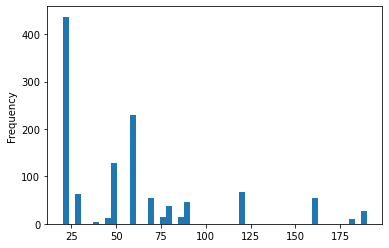

In [19]:
# Ploting to analyse features of the data
X['MSSubClass'].plot(kind='hist', bins=50)

In [11]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
#Training
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [13]:
#intercept and coef
print(regressor.intercept_)
print(regressor.coef_)

-1.1641532182693481e-10
[ 1.87576699e-15 -4.99822406e-13  4.66293670e-15  2.03793461e-11
  6.46288578e-14 -1.06007867e-14 -1.00000000e+00  2.00000000e+00]


In [14]:
# prediction
y_predict=regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
1360,189000,189000.0
575,118500,118500.0
72,185000,185000.0
1103,159500,159500.0
80,193500,193500.0
...,...,...
487,175000,175000.0
688,392000,392000.0
344,85000,85000.0
592,138000,138000.0


In [20]:
y_train_predict = regressor.predict(x_train)

In [21]:
#Accuracy of train data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error: 2.5700804447599997e-11
Mean Squared Error: 2.2917866051394184e-21
Root Mean Squared Error: 4.787260808791828e-11


In [16]:
#Accuracy of test data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 2.2069398406506573e-11
Mean Squared Error: 8.560392623055e-22
Root Mean Squared Error: 2.925814864794934e-11


In [26]:
score= metrics.r2_score(y_test,y_predict)
print(f'Acurracy is {score*100}%')

Acurracy is 100.0%
